Found 455 rows for product: VIU Premium


d:\Skripsi\Model Steps\Preprocessing\Step 1\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,101 (47.27 KB)

 Trainable params: 12,101 (47.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0208 - mae: 0.0931 - rmse: 0.1225 - val_loss: 0.0969 - val_mae: 0.2439 - val_rmse: 0.3030 - learning_rate: 0.0010
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0106 - mae: 0.0552 - rmse: 0.0753 - val_loss: 0.0601 - val_mae: 0.1692 - val_rmse: 0.2360 - learning_rate: 0.0010
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0085 - mae: 0.0551 - rmse: 0.0656 - val_loss: 0.0542 - val_mae: 0.1571 - val_rmse: 0.2247 - learning_rate: 0.0010
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074 - mae: 0.0493 - rmse: 0.0615 - val_loss: 0.0596 - val_mae: 0.1733 - val_rmse: 0.2376 - learning_rate: 0.0010
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0067 - mae: 0.0442 - rmse: 0.0599 - val_loss: 0.0541 - val_mae: 0.1613 - val_rmse: 0.2267 - learning_rate: 0.0010
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - mae: 0.0493 - rmse: 0.0670 - val_loss: 0.0477 - val

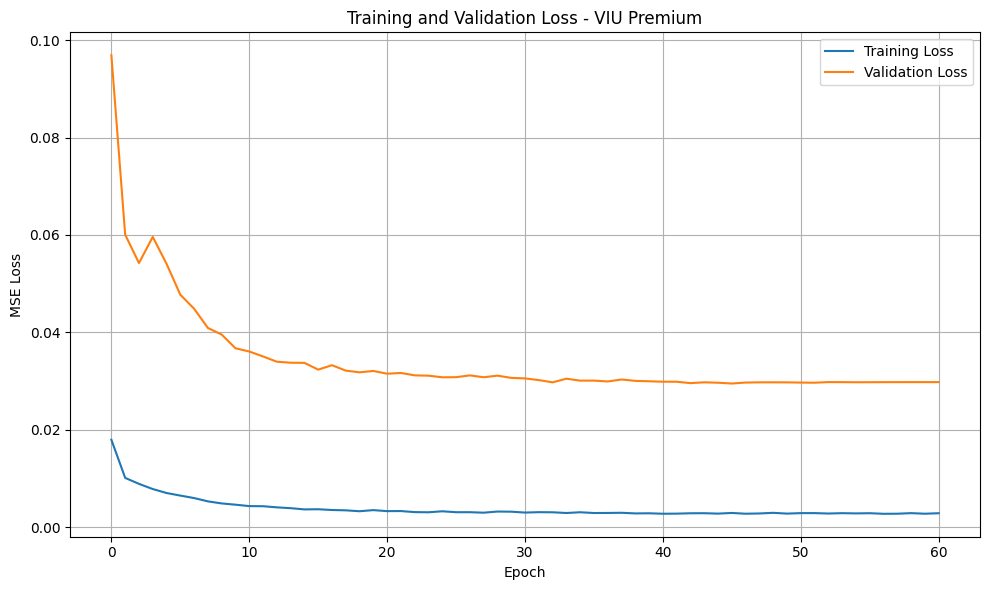

C:\Users\User\AppData\Local\Temp\ipykernel_4432\2639759329.py:188: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  next_full_unscaled_feature_row_filled = next_full_unscaled_feature_row_series.fillna(method='ffill').fillna(0)
d:\Skripsi\Model Steps\Preprocessing\Step 1\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_4432\2639759329.py:188: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  next_full_unscaled_feature_row_filled = next_full_unscaled_feature_row_series.fillna(method='ffill').fillna(0)
d:\Skripsi\Model Steps\Preprocessing\Step 1\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Mi

          Model Evaluation Results
-----------------------------------------------
Product: VIU Premium
Root Mean Squared Percentage Error (RMSPE): 31.97%
Test results with predictions and features saved to: ./test-result/VIU_Premium_predictions_vs_actuals.csv


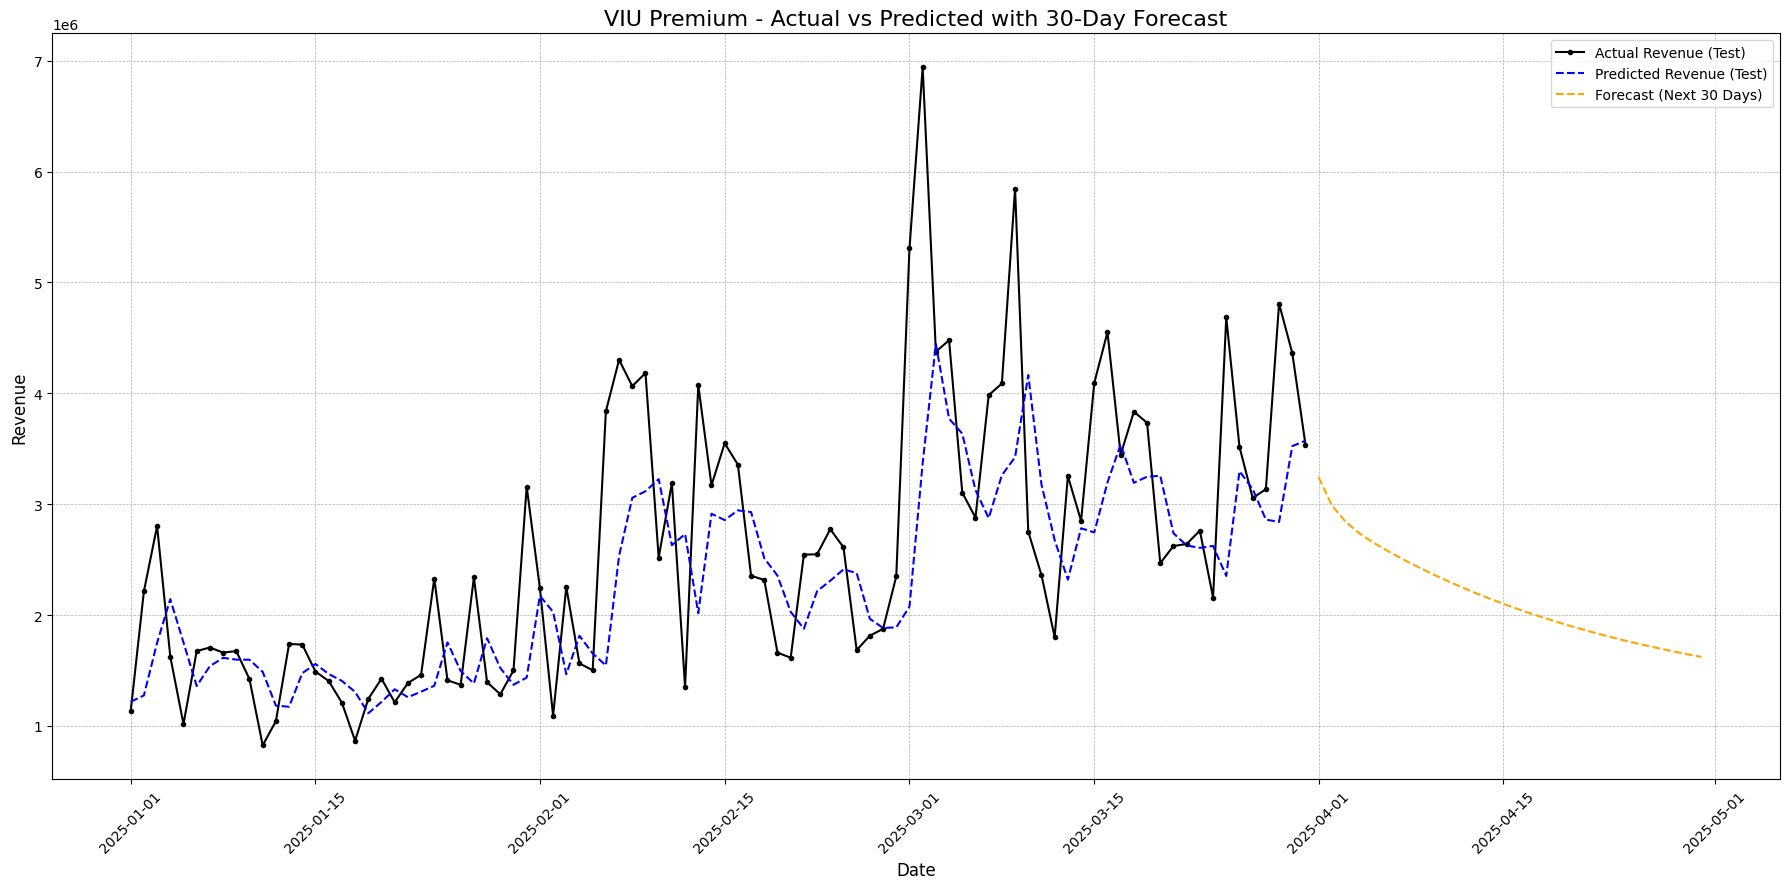

Model saved to ./model/lstm_model_VIU Premium.h5
Script finished.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

def calculate_rmspe(y_true, y_pred):
    """
    Calculates the Root Mean Squared Percentage Error between true and predicted values.
    """
    # Ensure there are no zero values in y_true to avoid division by zero
    non_zero_mask = y_true != 0
    y_true_safe = y_true[non_zero_mask]
    y_pred_safe = y_pred[non_zero_mask]

    if len(y_true_safe) == 0:
        print("Warning: Cannot calculate RMSPE because all true values are zero.")
        return np.nan # Return Not-a-Number if calculation is impossible

    # Calculate the percentage error
    percentage_error = (y_true_safe - y_pred_safe) / y_true_safe
    
    # Square the percentage errors, take the mean, then the square root
    rmspe = np.sqrt(np.mean(np.square(percentage_error))) * 100
    
    return rmspe

# Configuration
product_name = 'VIU Premium'
# CRITICAL: Use a sequence length greater than 1 to capture patterns.
SEQ_LEN = 1
EPOCHS = 100 
BATCH_SIZE = 32
FUTURE_DAYS = 30
VAL_SPLIT = 0.1
train_test_split_ratio = 0.8

# Feature columns
features = [
    'total_revenue',
    'total_revenue_ema_10',
    'total_revenue_lag_1'
]

# Load data from a single CSV
try:
    full_df = pd.read_csv('final_dataset.csv', parse_dates=['Tanggal'])
except FileNotFoundError:
    print("Error: 'final_dataset.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# --- Feature Engineering ---
product_df_base = full_df[full_df['Produk'] == product_name].copy()
print(f"Found {len(product_df_base)} rows for product: {product_name}")

if product_df_base.empty:
    print(f"No data found for product: {product_name} in 'final_dataset.csv'.")
    exit()

product_df_base = product_df_base.sort_values('Tanggal').reset_index(drop=True)

if 'total_revenue' not in product_df_base.columns:
    print("Error: 'total_revenue' column is missing.")
    exit()

product_df_base['total_revenue_ema_10'] = product_df_base['total_revenue'].ewm(span=10, adjust=False).mean()
product_df_base['total_revenue_lag_1'] = product_df_base['total_revenue'].shift(1)

# Handle potential NaNs
product_df_cleaned = product_df_base.dropna(subset=features).reset_index(drop=True)

if product_df_cleaned.empty:
    print(f"Error: No data remains for {product_name} after dropping NaNs.")
    exit()

# Split data into training and testing sets
split_index = int(len(product_df_cleaned) * train_test_split_ratio)
train_df = product_df_cleaned.iloc[:split_index].copy()
test_df = product_df_cleaned.iloc[split_index:].copy()

if train_df.empty:
    print(f"Error: Training set is empty for product: {product_name}.")
    exit()
    
# Normalize features
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features])
test_scaled = scaler.transform(test_df[features])

# Sequence generation
def create_sequences(data, seq_len=SEQ_LEN):
    x, y = [], []
    if len(data) <= seq_len: 
        print(f"Warning: Data length ({len(data)}) is not sufficient for sequence length ({seq_len}).")
        return np.array(x), np.array(y)
    for i in range(seq_len, len(data)):
        x.append(data[i-seq_len:i])
        y.append(data[i][0])
    return np.array(x), np.array(y)

x_train, y_train = create_sequences(train_scaled)
x_test, y_test = create_sequences(test_scaled)

if x_train.shape[0] == 0:
    print(f"Error: Not enough data to create training sequences for {product_name} with SEQ_LEN={SEQ_LEN}.")
    exit()

# Build model
model = Sequential([
    LSTM(
        units=50, # A moderate number of units
        activation='tanh',
        input_shape=(SEQ_LEN, len(features)),
        kernel_regularizer=l2(0.001) # L2 is often a good default
    ),
    Dropout(0.3),
    Dense(units=25, activation='relu'),
    Dense(1)
])

# Optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', RootMeanSquaredError(name='rmse')])
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, min_lr=1e-6)
callbacks_list = [early_stopping, reduce_lr]

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=callbacks_list,
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f"Training and Validation Loss - {product_name}")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
filename_base = product_name.replace(" ", "_").replace("/", "_")
plt.savefig(f'./loss-plot/{filename_base}_loss_plot.png')
plt.show()

# --- Forecasting Logic ---
# (Forecasting logic remains unchanged)
if len(test_scaled) >= SEQ_LEN:
    current_sequence_scaled = test_scaled[-SEQ_LEN:].copy()
    history_df_unscaled = test_df[['Tanggal', 'Produk', 'total_revenue']].iloc[-SEQ_LEN-7:].copy()
elif len(train_scaled) >= SEQ_LEN:
    current_sequence_scaled = train_scaled[-SEQ_LEN:].copy()
    history_df_unscaled = train_df[['Tanggal', 'Produk', 'total_revenue']].iloc[-SEQ_LEN-7:].copy()
else:
    print("Error: Not enough data to form an initial sequence for forecasting.")
    exit()

predicted_revenues_unscaled_list = []
for day_step in range(FUTURE_DAYS):
    input_for_model = current_sequence_scaled.reshape(1, SEQ_LEN, len(features))
    pred_scaled_revenue_component = model.predict(input_for_model, verbose=0)[0, 0]
    dummy_scaled_row = np.zeros((1, len(features)))
    dummy_scaled_row[0, 0] = pred_scaled_revenue_component
    pred_unscaled_revenue = scaler.inverse_transform(dummy_scaled_row)[0, 0]
    predicted_revenues_unscaled_list.append(pred_unscaled_revenue)
    last_tanggal = history_df_unscaled['Tanggal'].iloc[-1]
    next_tanggal = last_tanggal + pd.Timedelta(days=1)
    new_row_dict = {'Tanggal': next_tanggal, 'Produk': product_name, 'total_revenue': pred_unscaled_revenue}
    history_df_unscaled = pd.concat([history_df_unscaled, pd.DataFrame([new_row_dict])], ignore_index=True)
    temp_df_for_feature_eng = history_df_unscaled.copy()
    temp_df_for_feature_eng['total_revenue_ema_10'] = temp_df_for_feature_eng['total_revenue'].ewm(span=10, adjust=False).mean()
    temp_df_for_feature_eng['total_revenue_lag_1'] = temp_df_for_feature_eng['total_revenue'].shift(1)
    next_full_unscaled_feature_row_series = temp_df_for_feature_eng[features].iloc[-1]
    next_full_unscaled_feature_row_filled = next_full_unscaled_feature_row_series.fillna(method='ffill').fillna(0)
    next_full_scaled_feature_row = scaler.transform(next_full_unscaled_feature_row_filled.values.reshape(1, -1))
    current_sequence_scaled = np.vstack((current_sequence_scaled[1:], next_full_scaled_feature_row))

pred_rescaled = np.array(predicted_revenues_unscaled_list)

# --- Actual vs Predicted Plotting and CSV Saving ---
if x_test.shape[0] > 0 and len(y_test) > 0: 
    true_y_test_scaled = y_test.reshape(-1, 1)
    padding_test = np.zeros((len(true_y_test_scaled), len(features) - 1)) 
    true_y_inverse = scaler.inverse_transform(np.hstack((true_y_test_scaled, padding_test)))[:, 0]

    pred_test_scaled = model.predict(x_test, verbose=0) 
    pred_test_rescaled = scaler.inverse_transform(np.hstack((pred_test_scaled, np.zeros((len(pred_test_scaled), len(features) - 1)))))[:, 0]
    
    # Calculate and display RMSPE
    rmspe_value = calculate_rmspe(true_y_inverse, pred_test_rescaled)
    print("===============================================")
    print(f"          Model Evaluation Results")
    print("-----------------------------------------------")
    print(f"Product: {product_name}")
    print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe_value:.2f}%")
    print("===============================================")
    
    # Determine the correct dates for the test results
    actual_test_dates = test_df['Tanggal'].iloc[SEQ_LEN : SEQ_LEN + len(true_y_inverse)]

    # --- SAVE TEST RESULTS TO CSV ---
    if not actual_test_dates.empty:
        # 1. Get the slice of the original test dataframe that corresponds to the predictions.
        results_df = test_df.loc[actual_test_dates.index].copy()
        
        # 2. Add the predicted revenue as a new column.
        results_df['predicted_revenue'] = pred_test_rescaled

        # 3. For clarity, rename the original 'total_revenue' column to 'actual_revenue'.
        results_df.rename(columns={'total_revenue': 'actual_revenue'}, inplace=True)
        
        # 4. Define the output filename and save the dataframe.
        results_filename = f'./test-result/{filename_base}_predictions_vs_actuals.csv'
        results_df.to_csv(results_filename, index=False)
        
        print(f"Test results with predictions and features saved to: {results_filename}")
        print("===============================================")
    # --- END OF SAVE SECTION ---

    # Plotting logic
    if not actual_test_dates.empty:
        last_actual_date = actual_test_dates.iloc[-1]
        forecast_dates = pd.date_range(start=last_actual_date + pd.Timedelta(days=1), periods=FUTURE_DAYS)

        plt.figure(figsize=(18, 9)) 
        plt.plot(actual_test_dates, true_y_inverse, label='Actual Revenue (Test)', color='black', marker='.', linestyle='-')
        plt.plot(actual_test_dates, pred_test_rescaled, label='Predicted Revenue (Test)', color='blue', linestyle='--')
        plt.plot(forecast_dates, pred_rescaled, label=f'Forecast (Next {FUTURE_DAYS} Days)', color='orange', linestyle='--')
        
        plt.title(f'{product_name} - Actual vs Predicted with {FUTURE_DAYS}-Day Forecast', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Revenue', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.savefig(f'./test-plot/{filename_base}_test_and_forecast_plot.png')
        plt.show()
else:
    print("x_test is empty. Cannot evaluate or save test results. Plotting forecast only.")
    # (Plotting forecast-only logic remains the same)

# Save the trained model
model.save(f'./model/lstm_model_{product_name}.h5')
print(f"Model saved to ./model/lstm_model_{product_name}.h5")
print("Script finished.")